In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import keras
from keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import LeakyReLU
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')


In [24]:
train = pd.read_csv("/content/drive/My Drive/Colab Folder/kannada MNIST/train.csv")
test = pd.read_csv("/content/drive/My Drive/Colab Folder/kannada MNIST/test.csv")
dig_mnist = pd.read_csv("/content/drive/My Drive/Colab Folder/kannada MNIST/Dig-MNIST.csv")
sample_submission =pd.read_csv("/content/drive/My Drive/Colab Folder/kannada MNIST/sample_submission.csv")

In [25]:
print(f"Shape of train is {train.shape} \nShape of test is {test.shape} \nShape of dig_mnist is {dig_mnist.shape} \nShape of sample_submission is {sample_submission.shape}")

Shape of train is (60000, 785) 
Shape of test is (5000, 785) 
Shape of dig_mnist is (10240, 785) 
Shape of sample_submission is (5000, 2)


In [26]:
# First and Last Row and Column
train.iloc[[0,-1],[1,-1]]

,pixel0,pixel783
0,0,0
59999,0,0


Picture of 5 is : 


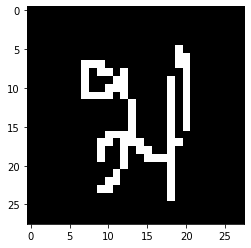

In [27]:
picture = train.iloc[5, 1:].values.reshape(28,28)
print("Picture of 5 is : ")
plt.imshow(picture, cmap=plt.get_cmap('gray'))
plt.show()

In [28]:
X = train.iloc[:, 1:].values.astype('float32') / 255
y = train.iloc[:, 0].values
print(f"Shape of X is {X.shape} Shape of y is {y.shape}")

Shape of X is (60000, 784) Shape of y is (60000,)


In [29]:
X = X.reshape(-1,28,28,1)
y = to_categorical(y, 10)
print(f"Shape of X is {X.shape} and Shape of y is {y.shape}")

Shape of X is (60000, 28, 28, 1) and Shape of y is (60000, 10)


In [30]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.10, random_state=42) 


In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(64,  (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(64,  (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),

    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),    
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(256, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),##
    tf.keras.layers.LeakyReLU(alpha=0.1),

    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(alpha=0.1),
 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)       

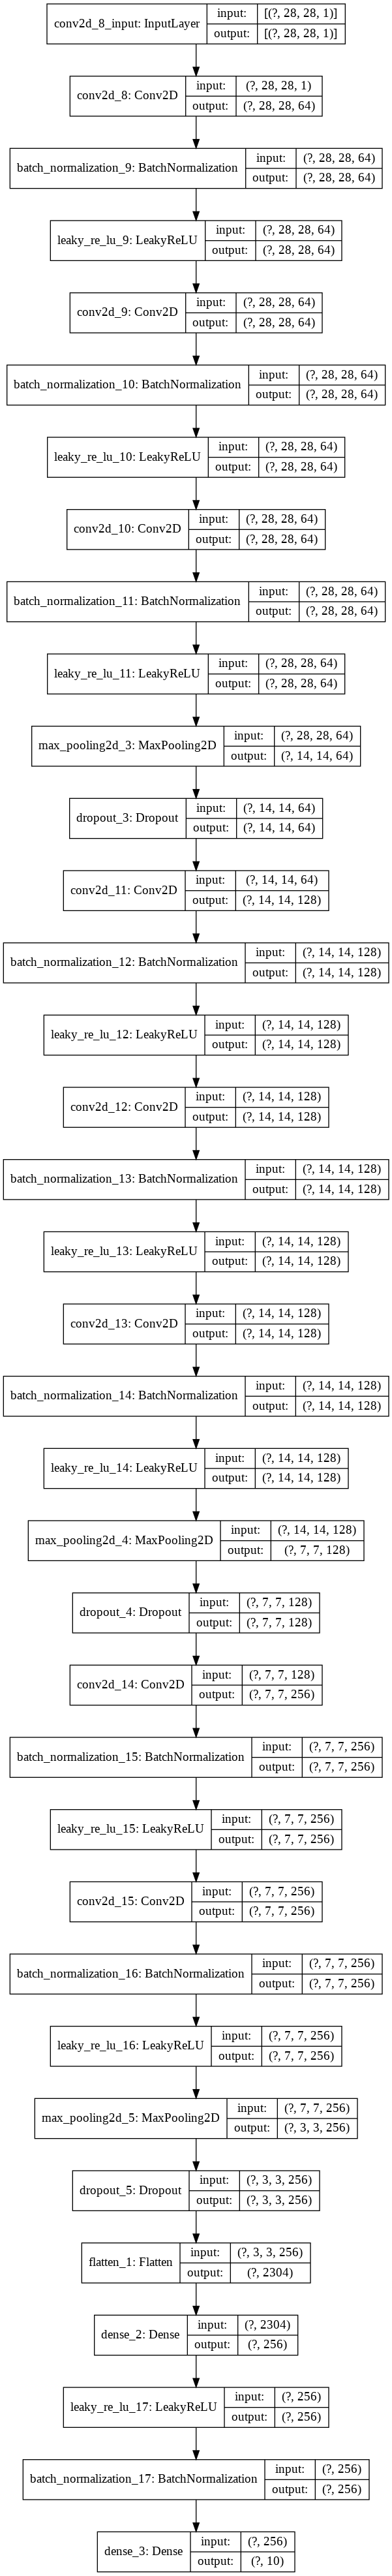

In [33]:
plot_model(model, to_file="model.png", show_shapes=True)

In [34]:
batch_size = 1024
num_classes = 10
epochs = 40

In [35]:
optimizer = RMSprop(learning_rate=0.002, ###########optimizer = RMSprop(learning_rate=0.0025,###########
    rho=0.9,
    momentum=0.1,
    epsilon=1e-07,
    centered=True,
    name='RMSprop')


model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=['accuracy'])

In [36]:
datagen_train = ImageDataGenerator(rotation_range = 10,
                                   width_shift_range = 0.25,
                                   height_shift_range = 0.25,
                                   shear_range = 0.1,
                                   zoom_range = 0.4,
                                   horizontal_flip = False)

datagen_val = ImageDataGenerator() 

In [37]:
step_train = x_train.shape[0] // batch_size
step_val = x_valid.shape[0] // batch_size

In [38]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau( 
    monitor='loss',    # Quantity to be monitored.
    factor=0.25,       # Factor by which the learning rate will be reduced. new_lr = lr * factor
    patience=2,        # The number of epochs with no improvement after which learning rate will be reduced.
    verbose=1,         # 0: quiet - 1: update messages.
    mode="auto",       # {auto, min, max}. In min mode, lr will be reduced when the quantity monitored has stopped decreasing; 
                       # in the max mode it will be reduced when the quantity monitored has stopped increasing; 
                       # in auto mode, the direction is automatically inferred from the name of the monitored quantity.
    min_delta=0.0001,  # threshold for measuring the new optimum, to only focus on significant changes.
    cooldown=0,        # number of epochs to wait before resuming normal operation after learning rate (lr) has been reduced.
    min_lr=0.00001     # lower bound on the learning rate.
    )

es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   verbose=1, 
                   patience=300, 
                   restore_best_weights=True)


In [39]:
history = model.fit(datagen_train.flow(x_train, y_train, batch_size=batch_size),
                              steps_per_epoch=len(x_train)//batch_size,
                              epochs=epochs,
                              validation_data=(x_valid, y_valid),
                              validation_steps=50,
                              callbacks=[learning_rate_reduction, es],
                              verbose=2
                    )


Epoch 1/40
52/52 - 32s - loss: 1.1213 - accuracy: 0.6217 - val_loss: 2.3284 - val_accuracy: 0.0928
Epoch 2/40
52/52 - 29s - loss: 0.2674 - accuracy: 0.9118 - val_loss: 0.9825 - val_accuracy: 0.8530
Epoch 3/40
52/52 - 29s - loss: 0.1566 - accuracy: 0.9483 - val_loss: 0.5105 - val_accuracy: 0.9462
Epoch 4/40
52/52 - 29s - loss: 0.1344 - accuracy: 0.9566 - val_loss: 0.2303 - val_accuracy: 0.9873
Epoch 5/40
52/52 - 30s - loss: 0.1030 - accuracy: 0.9659 - val_loss: 0.1054 - val_accuracy: 0.9883
Epoch 6/40
52/52 - 30s - loss: 0.0911 - accuracy: 0.9695 - val_loss: 0.0594 - val_accuracy: 0.9918
Epoch 7/40
52/52 - 29s - loss: 0.0860 - accuracy: 0.9708 - val_loss: 0.0702 - val_accuracy: 0.9755
Epoch 8/40
52/52 - 29s - loss: 0.0782 - accuracy: 0.9743 - val_loss: 0.0331 - val_accuracy: 0.9908
Epoch 9/40
52/52 - 29s - loss: 0.0768 - accuracy: 0.9737 - val_loss: 0.0312 - val_accuracy: 0.9880
Epoch 10/40
52/52 - 29s - loss: 0.0695 - accuracy: 0.9760 - val_loss: 0.0228 - val_accuracy: 0.9933
Epoch 11/

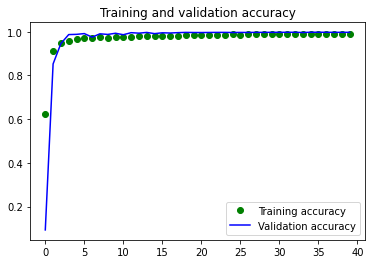

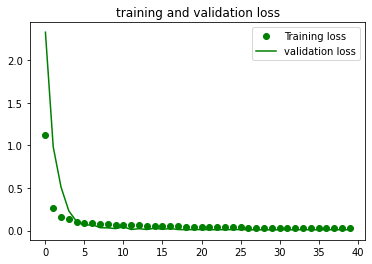

In [40]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(val_accuracy))
plt.plot(epochs, accuracy, 'go', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [42]:
model.evaluate(x_valid, y_valid, verbose=2);

188/188 - 2s - loss: 0.0095 - accuracy: 0.9977


### Confusion Matrix

In [43]:
y_predicted = model.predict(x_valid)
y_predicted = np.argmax(y_predicted, axis=1)

y_grand_truth = y_valid
y_grand_truth = np.argmax(y_grand_truth, axis=1)

cm = confusion_matrix(y_grand_truth, y_predicted)

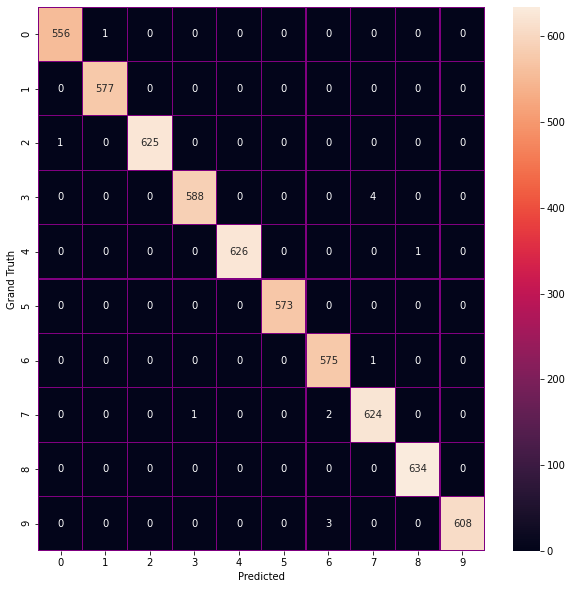

In [44]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm,fmt=".0f", annot=True,linewidths=0.1, linecolor="purple", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Grand Truth")
plt.show()

In [45]:
scores = np.zeros((10,3))
def calc_F1(num):
  TP = cm[num,num]
  FN = np.sum(cm[num,:])-cm[num,num]
  FP = np.sum(cm[:,num])-cm[num,num]
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  F1_score = 2*(recall * precision) / (recall + precision)
  return precision, recall, F1_score
for i in range(10):
   precision, recall, F1_score = calc_F1(i)
   scores[i,:] = precision, recall, F1_score
scores_frame = pd.DataFrame(scores,columns=["Precision", "Recall", "F1 Score"], index=[list(range(0, 10))])


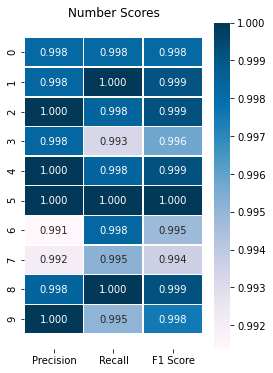

In [46]:
f, ax = plt.subplots(figsize = (4,6))
ax.set_title('Number Scores')
sns.heatmap(scores_frame, annot=True, fmt=".3f", linewidths=0.5, cmap="PuBu", cbar=True, ax=ax)
bottom, top = ax.get_ylim()
plt.ylabel("")
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


In [47]:
raw_dig = dig_mnist
raw_dig.head()
x_dig = raw_dig.iloc[:, 1:].values.astype('float32') / 255
y_dig = raw_dig.iloc[:, 0].values

x_dig = x_dig.reshape(-1,28,28,1)
y_dig = to_categorical(y_dig)
model.evaluate(x_dig, y_dig, verbose=2)


320/320 - 4s - loss: 0.4752 - accuracy: 0.9030


[0.47520962357521057, 0.903027355670929]

In [51]:
sample_sub = sample_submission
raw_test_id = test.id
raw_test = test.drop("id",axis="columns")
raw_test = raw_test / 255
test = raw_test.values.reshape(-1,28,28,1)
test.shape

(5000, 28, 28, 1)

In [52]:
sub=model.predict(test)     ##making prediction
sub=np.argmax(sub,axis=1) ##changing the prediction intro labels

sample_sub['label']=sub
sample_sub.to_csv('submission.csv',index=False)

In [54]:
sample_sub.head()

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7
